In [9]:
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np
from scipy.interpolate import make_interp_spline

In [14]:
df = pd.read_csv("N2_Thorsteinsonn_final_states_across_pressure.csv", index_col=0)
pressure_list_mTorr = [0.5, 0.7,1,2,4,8,16,30,50,80,100,110] # in mTor. Multiply by 0.13332237 to get in Pa
df["pressure"] = pressure_list_mTorr
df

,e,N2,N,N2+,N+,T_e,T_mono,T_diato,pressure
0,5.872306e+16,7.006644e+18,5.348110e+18,4.235372e+16,1.636934e+16,10.099889,0.037161,0.035429,0.5
1,6.844940e+16,8.806493e+18,7.356711e+18,4.781641e+16,2.063299e+16,8.730573,0.038279,0.037906,0.7
2,7.803265e+16,1.138456e+19,9.982670e+18,5.330819e+16,2.472446e+16,7.594482,0.039491,0.041579,1.0
3,9.187337e+16,1.952573e+19,1.634092e+19,6.266862e+16,2.920475e+16,6.007754,0.041615,0.052534,2.0
4,9.638350e+16,3.462506e+19,2.319189e+19,6.915707e+16,2.722643e+16,4.950289,0.042756,0.068915,4.0
5,9.250201e+16,6.114614e+19,2.849990e+19,7.177637e+16,2.072565e+16,4.216115,0.042481,0.090041,8.0
6,8.400449e+16,1.052841e+20,3.092331e+19,7.051145e+16,1.349303e+16,3.673999,0.041058,0.115100,16.0
7,7.447351e+16,1.691703e+20,3.056555e+19,6.630930e+16,8.164211e+15,3.280314,0.039198,0.141037,30.0
8,6.598245e+16,2.474015e+20,2.887925e+19,6.095228e+16,5.030168e+15,3.004731,0.037530,0.164264,50.0
9,5.771874e+16,3.515720e+20,2.661981e+19,5.468873e+16,3.030015e+15,2.777194,0.036005,0.187038,80.0


(9000000000000000.0, 1.3e+17)

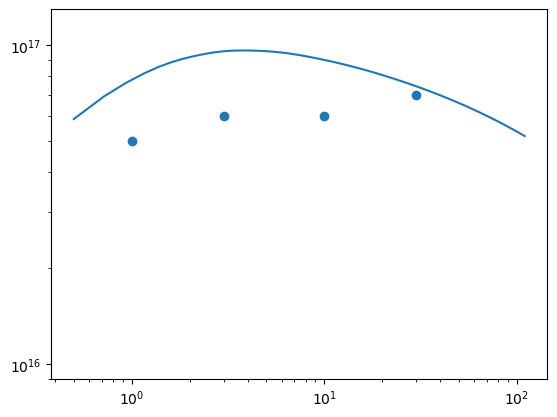

In [19]:
x, y = df["pressure"], df["e"]
X_Y_Spline = make_interp_spline(x, y)

# Returns evenly spaced numbers
# over a specified interval.
x_smothed = np.linspace(x.min(), x.max(), 500)
y_smothed = X_Y_Spline(x_smothed)

plt.loglog(x_smothed, y_smothed)
plt.scatter([1, 3, 10, 30], [5e16, 6e16, 6e16, 7e16])
plt.ylim(0.9e16, 1.3e17)